## Py-imp is the section of the project that is implemented using Python
This notebook is the feature selection section in a 4-phases

In [1]:
# Warning options (before all imports)
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=FutureWarning)
# %xmode Verbose # simplified traceback when an exception occurs
%xmode Plain

Exception reporting mode: Plain


### Install needed packages


In [2]:
# Install a conda package in the current Jupyter kernel
import sys
# !mamba install -c conda-forge --yes --prefix {sys.prefix} <pkg>
# !conda install -c conda-forge --yes --prefix {sys.prefix} <pkg>

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} - m pip install <pkg>

In [3]:
# 'sklearn for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} sktime-all-extras
# 'for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} feature_engine
# !mamba install -c conda-forge --yes --prefix {sys.prefix} mlxtend
# !mamba install -c conda-forge --yes --prefix {sys.prefix} statsmodels
# !mamba install -c conda-forge --yes --prefix {sys.prefix} ptitprince
# for tf.keras.utils.plot_model
# !mamba install -c conda-forge --yes --prefix {sys.prefix} graphviz python-graphviz

# # upgrade pip
# !{sys.executable} -m pip install --upgrade pip

# # Debug pip
# # Uninstall SetupTools:
# !{sys.executable} -m pip uninstall pip setuptools
# # Reinstall Setuptools:
# !{sys.executable} -m pip install --upgrade setuptools

# feature engineering Time series data
# !{sys.executable} -m pip install tsfresh
# pretty Matplotlib plots
# !{sys.executable} -m pip install git+https://github.com/iammelvink/LovelyPlots
# better progress bar
# !{sys.executable} -m pip install rich
# better 'describe'
# !{sys.executable} -m pip install skimpy
# For size encoded heatmaps
# !{sys.executable} -m pip install heatmapz
# XGBoost
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost
# !{sys.executable} -m pip install fastprogress
# !{sys.executable} -m pip install matplotx[all]
# !{sys.executable} -m pip install matplotx
# !{sys.executable} -m pip install lux
# !jupyter nbextension install --py luxwidget
# !jupyter nbextension enable --py luxwidget

# !{sys.executable} -m pip install sweetviz
# !{sys.executable} -m pip install yellowbrick
# !{sys.executable} -m pip install autoviz
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install dtale
# !{sys.executable} -m pip install sketch
# !{sys.executable} -m pip install watermark
# !{sys.executable} -m pip install snoop
# for tf.keras.utils.plot_model
# !{sys.executable} -m pip install pydot
# for optimising hyperparameters
# !{sys.executable} -m pip install optuna
# to save models to files
# !{sys.executable} -m pip install h5py
# for creating visualisations of model architectures
# !{sys.executable} -m pip install git+https://github.com/paulgavrikov/visualkeras
# !{sys.executable} -m pip install git+https://github.com/RedaOps/ann-visualizer
# !{sys.executable} -m pip install visualkeras

# for feature selection
# !{sys.executable} -m pip install Boruta
# for feature selection BorutaShap
# !{sys.executable} -m pip install git+https://github.com/Ekeany/Boruta-Shap
# !{sys.executable} -m pip install BorutaShap
# for feature selection using SHAP
# !{sys.executable} -m pip install shap-hypetune

# !{sys.executable} -m pip install matplotlib pandas==1.5.3 --force-reinstall

In [4]:
# %pip install <pkg> --user

### Importing libraries


In [5]:
import snoop

snoop.install()
%load_ext snoop
# eg. put this before debug code %%snoop

from skimpy import skim  # better describe
from rich.progress import track
import os, random
from io import BytesIO
import timeit

import math
from scipy.stats import chi2_contingency

# Dataset reducer
# Source: https://www.kaggle.com/code/joseguzman/reducing/notebook
from reducing import PandaReducer

# Local ChatGPT-ish
import sketch
os.environ["SKETCH_MAX_COLUMNS"] = "300"
os.environ["SKETCH_ROW_OVERRIDE_LIMIT"] = "5"

# Run locally
# os.environ["LAMBDAPROMPT_BACKEND"] = "StarCoder"
# os.environ["SKETCH_USE_REMOTE_LAMBDAPROMPT"] = "False"
# os.environ["HF_ACCESS_TOKEN"] = "your_hugging_face_token"

# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cycler
from matplotlib import rcParams
# matplotlib extensions
import matplotx
# For better distribution plots
# import ptitprince as pt
# For size encoded heatmaps
from heatmap import *

# Pre-processing
from sklearn.preprocessing import *
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import *
from mlxtend.evaluate.time_series import *
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
from sklearn.compose import *
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import *
import itertools
from sklearn.feature_selection import *
from BorutaShap import BorutaShap

# Modeling
import tensorflow as tf
from tensorflow.keras.utils import *
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import *
from sklearn.model_selection import *
from sktime.utils.plotting import plot_series
from sklearn.utils import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from xgboost import *
from lightgbm import *
from catboost import *
from sklearn.utils.class_weight import *
from sklearn.exceptions import NotFittedError

# To save models to files
# import pickle
import joblib # for saving models to .pkl or.sav files, for scikit-learn models
import h5py # for saving models to .hdf5 files, for TensorFlow models
from tensorflow.keras.models import *
# saved_model = load_model('model_name.hdf5')

# for optimising hyperparameters
import optuna
# to visualise of model architectures
# import visualkeras
# from ann_visualizer.visualize import ann_viz;

# numerical analysis
np.set_printoptions(linewidth=140)

# Pandas options
# pd.options.display.precision = 3
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
pd.options.mode.chained_assignment=None

pd.set_option('display.width', 140)

# Display Pipelines and models
from sklearn import set_config
set_config(display='diagram')

plt.style.reload_library()
# plt.style.use(matplotx.styles.dufte)
# plt.style.use('ipynb') # prettier plots
plt.style.use(['ipynb', 'colors10-markers'])
# Always put after custom styles
rcParams['axes.spines.top'] = False # remove top border of plot
rcParams['axes.spines.bottom'] = True # keep top border of plot
rcParams['axes.spines.left'] = True # keep top border of plot
rcParams['axes.spines.right'] = True # keep top border of plot
# rcParams['axes.grid' ] = True
rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset figsize

# To display charts in Jupyter
%matplotlib inline

# Matplotlib options
rcParams['figure.dpi'] = 600
# rcParams['figure.figsize'] = 8, 6
rcParams['legend.fontsize'] = "large"
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 1
rcParams["figure.autolayout"] = True

# For reproducibility
# rng = np.random.RandomState(0)
rng = 777
os.environ['PYTHONHASHSEED'] = str(rng)
random.seed(rng)
np.random.seed(rng)
tf.random.set_seed(rng)

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(rng)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
# tf.config.experimental.enable_op_determinism()
os.environ['TF_DETERMINISTIC_OPS'] = "True"
os.environ["TF_DISABLE_SEGMENT_REDUCTION_OP_DETERMINISM_EXCEPTIONS"] = "True"

In [6]:
%load_ext watermark
# %watermark
%watermark --iversions

pandas    : 1.5.3
sketch    : 0.4.2
sys       : 3.8.17 | packaged by conda-forge | (default, Jun 16 2023, 07:01:59) [MSC v.1929 64 bit (AMD64)]
seaborn   : 0.11.0
matplotlib: 3.7.1
h5py      : 3.9.0
scipy     : 1.10.1
xgboost   : 2.0.0
joblib    : 1.3.2
keras     : 2.10.0
numpy     : 1.23.5
sklearn   : 1.3.1
matplotx  : 0.3.10
optuna    : 3.3.0
tensorflow: 2.10.1



In [7]:
# Helper functions for categorical type casting
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()]
            for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels',
                                    'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def return_categoricals(df, threshold=5):
    """
        Returns a list of columns that have less than or equal to
        `threshold` number of unique categorical levels
    """
    return list(filter(lambda c: c if len(df[c].unique()) <= threshold else None,
                       df.columns))

# def return_categoricals(df, threshold=5):
#     # create an empty list to store the categorical columns
#     categorical_columns = []
#     # loop through each column in the dataframe
#     for c in df.columns:
#         # try to convert the column values to numbers
#         try:
#             pd.to_numeric(df[c])
#             # if no error occurs, skip the column
#             pass
#         # if an error occurs, check the number of unique values
#         except:
#             if len(df[c].unique()) <= threshold:
#                 # if the number of unique values is less than or equal to the threshold, append the column name to the list
#                 categorical_columns.append(c)
#     # return the list of categorical columns
#     return categorical_columns

def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [8]:
# allow memory growth of GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

<a id="import-and-clean-data"></a>
## 1.   Import and Clean Data

In [9]:
data_path = "../../data/d_machines_cleaned/"

df_pdm_machines = PandaReducer().reduce(
    pd.read_csv(f"{data_path}/final_pdm_machines_cleaned.csv", parse_dates=["datetime"]))

# # Changing format's of date-time columns. Sort based on date for better readability
tables = [df_pdm_machines]
for dataset in tables:
    dataset.sort_values(["datetime", "machineID"],
    inplace=True, ignore_index=True)

Dataset reduced 62.81% : 89.12 to 33.14 MB in 2.74 seconds


In [10]:
to_cast = return_categoricals(df_pdm_machines, threshold=5)
df_pdm_machines = to_categorical(to_cast, df_pdm_machines)
df_pdm_machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292019 entries, 0 to 292018
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   datetime                292019 non-null  datetime64[ns]
 1   machineID               292019 non-null  int8          
 2   volt_lag_mean_3h        292019 non-null  float32       
 3   rotate_lag_mean_3h      292019 non-null  float32       
 4   pressure_lag_mean_3h    292019 non-null  float32       
 5   vibration_lag_mean_3h   292019 non-null  float32       
 6   volt_lag_sd_3h          292019 non-null  float32       
 7   rotate_lag_sd_3h        292019 non-null  float32       
 8   pressure_lag_sd_3h      292019 non-null  float32       
 9   vibration_lag_sd_3h     292019 non-null  float32       
 10  volt_lag_mean_24h       292019 non-null  float32       
 11  rotate_lag_mean_24h     292019 non-null  float32       
 12  pressure_lag_mean_24h   292019

In [11]:
print(f"Summary for DataFrame: df_pdm_machines")
summarize_categoricals(df_pdm_machines, show_levels=True)

Summary for DataFrame: df_pdm_machines


,Levels,No. of Levels,No. of Missing Values
datetime,"[2015-01-01T09:00:00.000000000, 2015-01-01T12:...",2920,0
machineID,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",100,0
volt_lag_mean_3h,"[167.69434, 176.97246, 168.9199, 172.523, 147....",267927,0
rotate_lag_mean_3h,"[437.2089, 482.49496, 472.07178, 493.32242, 43...",275958,0
pressure_lag_mean_3h,"[94.93005, 99.352455, 90.04281, 97.962135, 152...",272261,0
vibration_lag_mean_3h,"[40.247875, 33.345875, 45.85976, 40.632053, 32...",275233,0
volt_lag_sd_3h,"[9.150737, 10.233862, 11.682536, 17.751614, 9....",290228,0
rotate_lag_sd_3h,"[15.576324, 31.894785, 62.903927, 35.574364, 6...",290166,0
pressure_lag_sd_3h,"[17.636868, 11.060139, 7.5677595, 18.505117, 8...",290155,0
vibration_lag_sd_3h,"[3.2832463, 4.651387, 8.0258665, 3.508214, 10....",290224,0


Descriptive statistics for df_pdm_machines data

In [12]:
print("Total number of df_pdm_machines records: %d" % len(df_pdm_machines.index))
print(df_pdm_machines.head(3))
# skim(df_pdm_machines)
df_pdm_machines.describe().T.style.background_gradient(axis=0, cmap='YlOrRd')

Total number of df_pdm_machines records: 292019
             datetime  machineID  volt_lag_mean_3h  rotate_lag_mean_3h  pressure_lag_mean_3h  vibration_lag_mean_3h  volt_lag_sd_3h  \
0 2015-01-01 09:00:00          2        167.694336          437.208893             94.930054              40.247875        9.150737   
1 2015-01-01 09:00:00          3        176.972458          482.494965             99.352455              33.345875       10.233862   
2 2015-01-01 09:00:00          4        168.919907          472.071777             90.042809              45.859760       11.682536   

   rotate_lag_sd_3h  pressure_lag_sd_3h  vibration_lag_sd_3h  volt_lag_mean_24h  rotate_lag_mean_24h  pressure_lag_mean_24h  \
0         15.576324           17.636868             3.283246         169.368378           450.479523              96.100517   
1         31.894785           11.060139             4.651387         173.228378           452.886475             100.159653   
2         62.903927           

,count,mean,std,min,25%,50%,75%,max
machineID,292019.000000,50.503025,28.864336,1.000000,26.000000,51.000000,76.000000,100.000000
volt_lag_mean_3h,292019.000000,170.778885,9.502797,125.532501,164.450340,170.435257,176.613693,241.420715
rotate_lag_mean_3h,292019.000000,446.598053,33.138813,211.811172,427.550095,448.377655,468.444489,586.682922
pressure_lag_mean_3h,292019.000000,100.860214,7.417788,72.118637,96.238964,100.234825,104.407444,162.309647
vibration_lag_mean_3h,292019.000000,40.385387,3.479337,26.569635,38.147839,40.145905,42.228165,69.311325
volt_lag_sd_3h,292019.000000,13.299464,6.966437,0.025508,8.027443,12.495745,17.689126,58.444332
rotate_lag_sd_3h,292019.000000,44.456505,23.216949,0.078993,26.904894,41.793873,59.104218,179.903046
pressure_lag_sd_3h,292019.000000,8.885712,4.656142,0.027416,5.370357,8.345924,11.789967,35.659363
vibration_lag_sd_3h,292019.000000,4.441186,2.320377,0.015277,2.684608,4.173967,5.900296,18.305595
volt_lag_mean_24h,292019.000000,170.739258,4.180553,156.713608,168.100807,170.285858,172.609818,206.333893


In [13]:
# Duration of the df_pdm_machines data
print("Duration of the df_pdm_machines data:")
df_pdm_machines.datetime.min(), df_pdm_machines.datetime.max()

Duration of the df_pdm_machines data:


(Timestamp('2015-01-01 09:00:00'), Timestamp('2016-01-01 06:00:00'))

<a id="data-preprocessing"></a>
## 4.   Data Preprocessing

Data needs to be one-hot-encoded before applying machine learning models.

In [14]:
# Drop datatime because this is a prediction and not forecasting
# Drop machineID because it can be compared to a person's ID number which is not useful for the model
# Drop model of machine because this problem is focusing on failures by component level
df_pdm_machines.drop(['datetime', 'machineID', 'model'], axis=1, inplace=True)

#### Using first 20000 to experiment with

In [15]:
# Using first 20000 to experiment with
# df_pdm_machines = df_pdm_machines.iloc[:20000]

In [16]:
# reduce size of the dataframe
df_pdm_machines = PandaReducer().reduce(df_pdm_machines)
df_pdm_machines.info()

Dataset reduced 0.00% : 29.52 to 29.52 MB in 0.46 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292019 entries, 0 to 292018
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   volt_lag_mean_3h        292019 non-null  float32 
 1   rotate_lag_mean_3h      292019 non-null  float32 
 2   pressure_lag_mean_3h    292019 non-null  float32 
 3   vibration_lag_mean_3h   292019 non-null  float32 
 4   volt_lag_sd_3h          292019 non-null  float32 
 5   rotate_lag_sd_3h        292019 non-null  float32 
 6   pressure_lag_sd_3h      292019 non-null  float32 
 7   vibration_lag_sd_3h     292019 non-null  float32 
 8   volt_lag_mean_24h       292019 non-null  float32 
 9   rotate_lag_mean_24h     292019 non-null  float32 
 10  pressure_lag_mean_24h   292019 non-null  float32 
 11  vibration_lag_mean_24h  292019 non-null  float32 
 12  volt_lag_sd_24h         292019 non-null  float32 
 13  r

In [17]:
X = df_pdm_machines.iloc[:, :-1]
# X = df_pdm_machines.drop(['datetime', 'machineID', 'model'], axis=1).iloc[:, :-1]
y = df_pdm_machines['failure']

#### Features before feature selection

In [18]:
X.shape

(292019, 36)

In [19]:
X.head(3)

,volt_lag_mean_3h,rotate_lag_mean_3h,pressure_lag_mean_3h,vibration_lag_mean_3h,volt_lag_sd_3h,rotate_lag_sd_3h,pressure_lag_sd_3h,vibration_lag_sd_3h,volt_lag_mean_24h,rotate_lag_mean_24h,pressure_lag_mean_24h,vibration_lag_mean_24h,volt_lag_sd_24h,rotate_lag_sd_24h,pressure_lag_sd_24h,vibration_lag_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,datetime_month,datetime_week,datetime_day_of_week,datetime_day_of_month,datetime_hour,datetime_weekend,datetime_month_sin,datetime_month_cos,datetime_hour_sin,datetime_hour_cos
0,167.694336,437.208893,94.930054,40.247875,9.150737,15.576324,17.636868,3.283246,169.368378,450.479523,96.100517,39.821854,11.344186,56.997864,9.632777,4.672664,0,0,0,0,0,199.125,139.125,169.125,34.125,7,1,1,3,1,9,0,0.5,0.866025,0.433884,-0.900969
1,176.972458,482.494965,99.352455,33.345875,10.233862,31.894785,11.060139,4.651387,173.228378,452.886475,100.159653,37.333725,12.622225,59.955311,12.204017,5.097741,0,0,0,0,0,139.125,34.125,199.125,184.125,8,1,1,3,1,9,0,0.5,0.866025,0.433884,-0.900969
2,168.919907,472.071777,90.042809,45.859760,11.682536,62.903927,7.567760,8.025867,169.122009,456.221405,99.904404,39.504959,12.179081,61.278572,8.771438,3.869699,0,0,0,0,0,154.125,199.125,49.125,19.125,7,1,1,3,1,9,0,0.5,0.866025,0.433884,-0.900969


In [20]:
feature_names = X.columns

In [21]:
# Check categorical features
print(X.select_dtypes(include='category').shape)

(292019, 7)


#### Phase 1: Variance Thresholding

In [22]:
# Get numerical features
X_numeric = X.select_dtypes(exclude='category')

# Normalize data
normalized_df = X_numeric / X_numeric.mean()

# Init, fit VT
vt = VarianceThreshold(threshold=0.05)
# vt = VarianceThreshold(threshold=0.003)
_ = vt.fit(normalized_df)

X_numeric.shape

(292019, 29)

In [23]:
# Get a boolean mask
mask = vt.get_support()

# Subset the data
X_reduced = X_numeric.loc[:, mask]
X_reduced.shape

(292019, 17)

#### Phase 2: Pairwise Correlation

In [24]:
def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()

    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Subset the matrix
    reduced_matrix = matrix.mask(mask)

    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]

    return to_drop

In [25]:
# to_drop = identify_correlated(X_reduced, threshold=0.5)
to_drop = identify_correlated(X_reduced, threshold=0.9)
len(to_drop)

1

In [26]:
X_reduced.drop(to_drop, axis=1, inplace=True)

In [27]:
X_reduced.shape

(292019, 16)

#### Phase 3: Recursive Feature Elimination with Cross-Validation (RFECV)

In [28]:
y_temp = y

y_trans = LabelEncoder()
y_temp = y_trans.fit_transform(y_temp)

In [29]:
# Init rfecv
rfecv = RFECV(
    estimator=LinearRegression(),
    scoring="r2",
    cv=3,
    n_jobs=-1,
    min_features_to_select=5,
    step=1,
)

# Fit
_ = rfecv.fit(X_reduced, y_temp)

In [30]:
# Get a boolean mask for the features to keep
mask = rfecv.support_

X_reduced = X_reduced.loc[:, mask]

In [31]:
X_reduced.shape

(292019, 12)

In [32]:
# Join the categorical and numerical subsets
X_reduced = pd.concat([X_reduced, X.select_dtypes(include='category')], axis=1)

In [33]:
X_reduced.shape

(292019, 19)

#### Phase 4: Boruta-SHAP (includes categorical features)

In [34]:
# random_forest = RandomForestClassifier(
#     class_weight='balanced',
#     n_estimators = 100,
#     # criterion='entropy', 
#     max_depth=3, 
#     n_jobs=-1, 
#     random_state=rng)

# # fit boruta-SHAP
# boruta_shap_selector = BorutaShap(random_forest, importance_measure='shap', classification=True)
# boruta_shap_selector.fit(X=X_reduced, y=y_temp, verbose=True, n_trials=50, random_state=rng, train_or_test='train', stratify=None, normalize=False)

  0%|          | 0/50 [00:00<?, ?it/s]

13 attributes confirmed important: ['error3count', 'error5count', 'datetime_day_of_month', 'datetime_hour_sin', 'error1count', 'error4count', 'error2count', 'datetime_week', 'comp1', 'age', 'comp2', 'comp4', 'comp3']
5 attributes confirmed unimportant: ['vibration_lag_sd_3h', 'datetime_day_of_week', 'pressure_lag_sd_3h', 'datetime_weekend', 'datetime_month_cos']
1 tentative attributes remains: ['datetime_hour_cos']


#### Save trained feature selection model for modelling phase

In [35]:
# # Save trained feature selection model for modelling phase
# # save the model to disk
# filename = '../../code/machines/models/four_phase_selector.sav'
# joblib.dump(boruta_shap_selector, open(filename, 'wb'))

#### Load trained feature selection model for modelling phase

In [36]:
# load the model from disk
filename = '../../code/machines/models/four_phase_selector.sav'
boruta_shap_selector = joblib.load(open(filename, 'rb'))

#### Apply feature selection

In [37]:
X_reduced = boruta_shap_selector.Subset()

In [38]:
X_reduced.shape

(292019, 13)

### List of features to use for the modelling phase

In [39]:
# Assuming X and X_reduced are pandas dataframes
# Get the column names of X_reduced as a list
col_list = X_reduced.columns.tolist()

print("Features to use for the modelling phase:\n\n", col_list)

Features to use for the modelling phase:

 ['error3count', 'error5count', 'datetime_day_of_month', 'datetime_hour_sin', 'error1count', 'error4count', 'error2count', 'datetime_week', 'comp1', 'age', 'comp2', 'comp4', 'comp3']


#### Save feature names to CSV

In [40]:
# features_to_keep = pd.DataFrame(col_list)
# features_to_keep.to_csv("../../code/machines/models/features_to_keep.csv", index=False, header=False)

In [41]:
# Filter the columns of X by using the list
X = X.loc[:, col_list]

In [42]:
X.shape

(292019, 13)

In [43]:
X.head(3)

,error3count,error5count,datetime_day_of_month,datetime_hour_sin,error1count,error4count,error2count,datetime_week,comp1,age,comp2,comp4,comp3
0,0,0,1,0.433884,0,0,0,1,199.125,7,139.125,34.125,169.125
1,0,0,1,0.433884,0,0,0,1,139.125,8,34.125,184.125,199.125
2,0,0,1,0.433884,0,0,0,1,154.125,7,199.125,19.125,49.125


<a id="train-test-split"></a>
### 4.1.   Train-Test split
CatBoost classifier does not require any knd of preprocessing while Naive bayes requires a different kind of preprocesing. Therefore, we will use raw/ unmodified data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) for CatBoost and preprocessed data (`X_train, X_test, y_train, y_test`) for all other classifiers. For Naive Bayes, we will use the raw data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) and preprocess it as required in the Naive Bayes section.

In [44]:
categorical_columns = list(X.select_dtypes(include='category').columns)
numeric_columns = list(X.select_dtypes(exclude='category').columns)

In [45]:
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train, X_test, y_train, y_test = data_splits

# For CatBoost and Naive Bayes
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = data_splits

list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(292019, 13), (292019,), (204413, 13), (87606, 13), (204413,), (87606,)]

In [46]:
# fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [47]:
pd.Series(y).value_counts()

none     286232
comp2      2009
comp1      1536
comp4      1264
comp3       978
Name: failure, dtype: int64

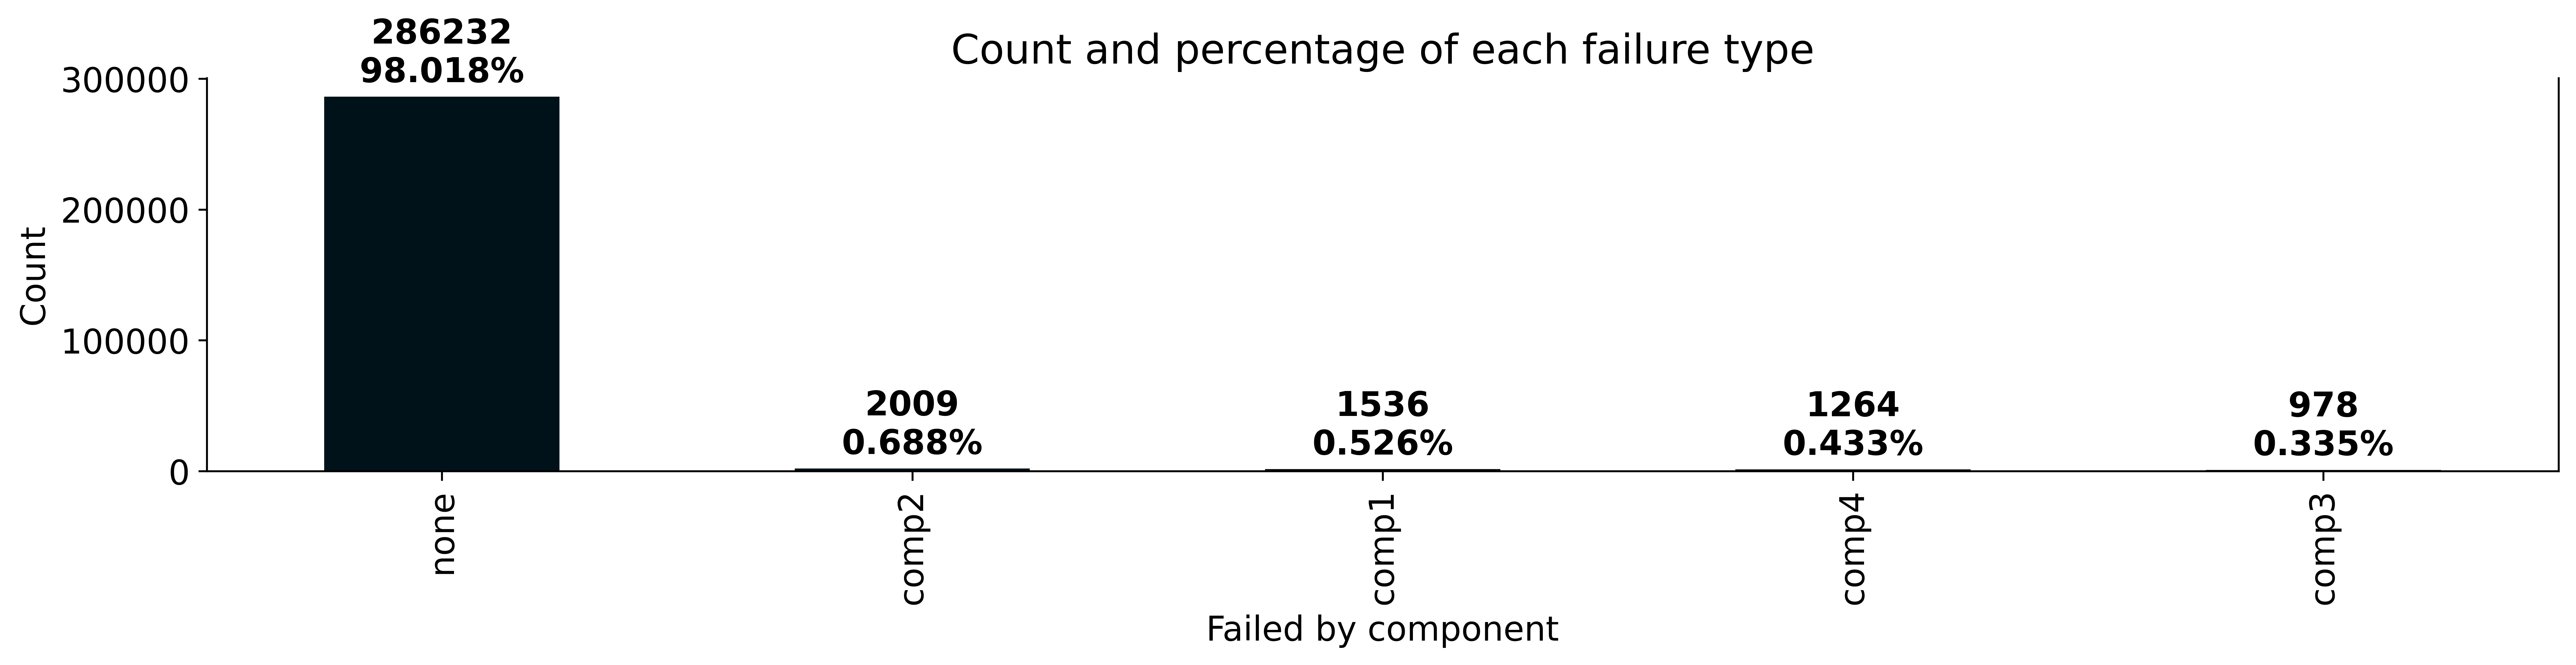

In [48]:
plt.figure(figsize=(15, 4))
ax = pd.Series(y).value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Failed by component')
plt.title('Count and percentage of each failure type')
total = pd.Series(y).count()
for p in ax.patches:
    count = p.get_height()
    percent = '{:.3f}%'.format(100 * count / total)
    ax.annotate(str(count) + '\n' + percent + '\n', (p.get_x() + p.get_width() / 2., p.get_height()),
                va='center', ha='center', fontweight='bold', 
                color='#000', xytext=(0, 10), textcoords='offset points')
plt.show();

<a id="preprocessing-pipeline%3A-one-hot-encoding%2C-standardization"></a>
### 4.2.   Preprocessing Pipeline: One-hot Encoding, Standardization
We need to standardize the continuous or quantitative variables/ features before applying Machine Learning models. This is important because if we don't standardize the features, features with high variance that are orders of magnitude larger that others might dominate the model fitting process and causing the model unable to learn from other features (with lower variance) correctly as expected. <br/>
There is no need to standardize categorical variables.

To know which algorithms require standardization/ feature scaling read this useful [stackoverflow post](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm).

***Also we need to standardize the data only after performing train-test split because if we standardize before splitting then there is a chance for some information leak from the test set into the train set. We always want the test set to be completely new to the ML models. [Read more](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data)***

In [49]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', dtype=np.int8))]) # np.int8 = 0 to 255, 1 byte. ONLY POSITIVE INTEGERS

## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
    remainder='passthrough')

## Applying Column Transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)

In [50]:
# Save feature names after one-hot encoding for feature importances plots
try:
    # if no error occurs
    feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
    feature_names = numeric_columns + feature_names
# if an error occurs, get the feature_names from X
except:
    feature_names = list(X.columns)

#### Features after feature selection

In [51]:
print(feature_names)
print(len(feature_names))

['datetime_day_of_month', 'datetime_hour_sin', 'datetime_week', 'comp1', 'age', 'comp2', 'comp4', 'comp3', 'error3count_1', 'error3count_2', 'error5count_1', 'error5count_2', 'error1count_1', 'error1count_2', 'error4count_1', 'error4count_2', 'error4count_3', 'error2count_1', 'error2count_2']
19


In [52]:
list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(292019, 13), (292019,), (204413, 19), (87606, 19), (204413,), (87606,)]

<a id="data-modeling"></a>
## 5.   Data Modeling
Since the dataset is imbalanced we will be using class-weighted/ cost-sensitive learning. In cost-sensitive learning, a weighted cost function is used. Therefore, misclassifying a sample from the minority class will cost the classifiers more than misclassifying a sample from the majority class. In most of the Sklearn classifiers, cost-sensitive learning can be enabled by setting `class_weight='balanced'`.

<a id="utility-functions"></a>
### 5.1.   Utility Functions

In [53]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """

    # labels = labels if labels else pd.Series(y).unique()
    labels = pd.Series(y).unique()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='YlOrRd', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
      # Plot the text on each cell
    # for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    #     plt.text(j, i, f"{matrix[i, j]} ({matrix[i, j]*100:.1f}%)",
    #             horizontalalignment="center")
    plt.close()
    
    return fig

In [54]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """

    # Plotting ROC curve for multi-class classification not working yet
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted')
    # auc = round(roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted'), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [55]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    # Plotting Precision-Recall curve for multi-class classification not working yet
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bboX_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [56]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [57]:
def train_clf(clf, X_train, y_train, sample_weight=None, neural_net=False, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(X_train)
        
        # For neural nets
        if neural_net:
            y_pred_train = y_pred_train.argmax(axis=1) # to get the highest number in the prediction probabilities list
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(X_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(X_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(X_train)
    # print(len(y_pred_train))
    # print(y_pred_train.shape)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [58]:
def model_memory_size(clf):
    # This function returns the size of the model in Bytes
    buffer = BytesIO()
    joblib.dump(clf, buffer, compress=0) # compress=0 because it's faster (no compression)
    return sys.getsizeof(buffer.getvalue())

In [59]:
def report(clf, X_train, y_train, X_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, X_train, y_train,
                                      sample_weight=sample_weight,
                                      neural_net=neural_net,
                                      refit=refit) # error here
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(X_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = y_probs.argmax(axis=1) # to get the highest number in the prediction probabilities list
    else:
        y_probs = clf.predict_proba(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted') # ovr = one vs rest, ovo = one vs one
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions, average='weighted'), func(y_test, test_predictions, average='weighted')]
        
    ## Model Memory
    model_mem = None
    if not neural_net:
        model_mem = model_memory_size(clf) / 1024
        # model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {X_train.shape[0]} samples")
    print(f" Test Size: {X_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {train_time} seconds")
    print(f" Testing Time: {test_time} seconds")
    # print(f"Training Time: {round(train_time, 3)} seconds")
    # print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))   
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions), labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")

        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        # roc_axes = axes[0, 0]
        # pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                # roc_axes = axes[0, 1]
                # pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()

        ## ROC and Precision-Recall curves
        # clf_name = clf.__class__.__name__
        # roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        # precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [60]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='f1-score'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """
    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Train Accuracy', 'Test Accuracy', 'Test ROC-AUC']
            #  'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = clf_reports[i][score]
        # scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        train_acc = clf_reports[i]['accuracy'][0]
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        # true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], train_acc, test_acc, roc_auc]
        # table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    ## Compare Plots
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # # ROC and Precision-Recall
    # for i in range(len(clf_reports)):
    #     clf_probs = clf_reports[i]['test_probs']
    #     roc_plot(y_test, clf_probs, label=clf_names[i],
    #              compare=True, ax=axes[0])
    #     precision_recall_plot(y_test, clf_probs, label=clf_names[i],
    #                           compare=True, ax=axes[1])
    # # Plot No-Info classifier
    # axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    # fig.tight_layout()
    # plt.close()
    
    # return table.T, fig
    return table.T

### Set primary metric to be used

In [61]:
# primary_eval_metric = metrics.accuracy_score
primary_eval_metric = metrics.f1_score

In [62]:
confusion_lbs = pd.Series(y).unique()
print(confusion_lbs)

['none', 'comp1', 'comp4', 'comp3', 'comp2']
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']


#### Performance after feature selection

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=0.2, n_jobs=-1,
                       random_state=777)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 204413 samples
 Test Size: 87606 samples
---------------------------------------------
Training Time: 3.72115430000008 seconds
 Testing Time: 0.2440427000001364 seconds
---------------------------------------------
Train Accuracy:  0.9827554998948208
 Test Accuracy:  0.9825011985480446
---------------------------------------------
Train F1 Score:  0.9853093208786365
 Test F1 Score:  0.9855624039648655

---------------------------------------------
 Area Under ROC (test):  0.993636598009276
---------------------------------------------
Model Memory Size: 4366.970703125 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

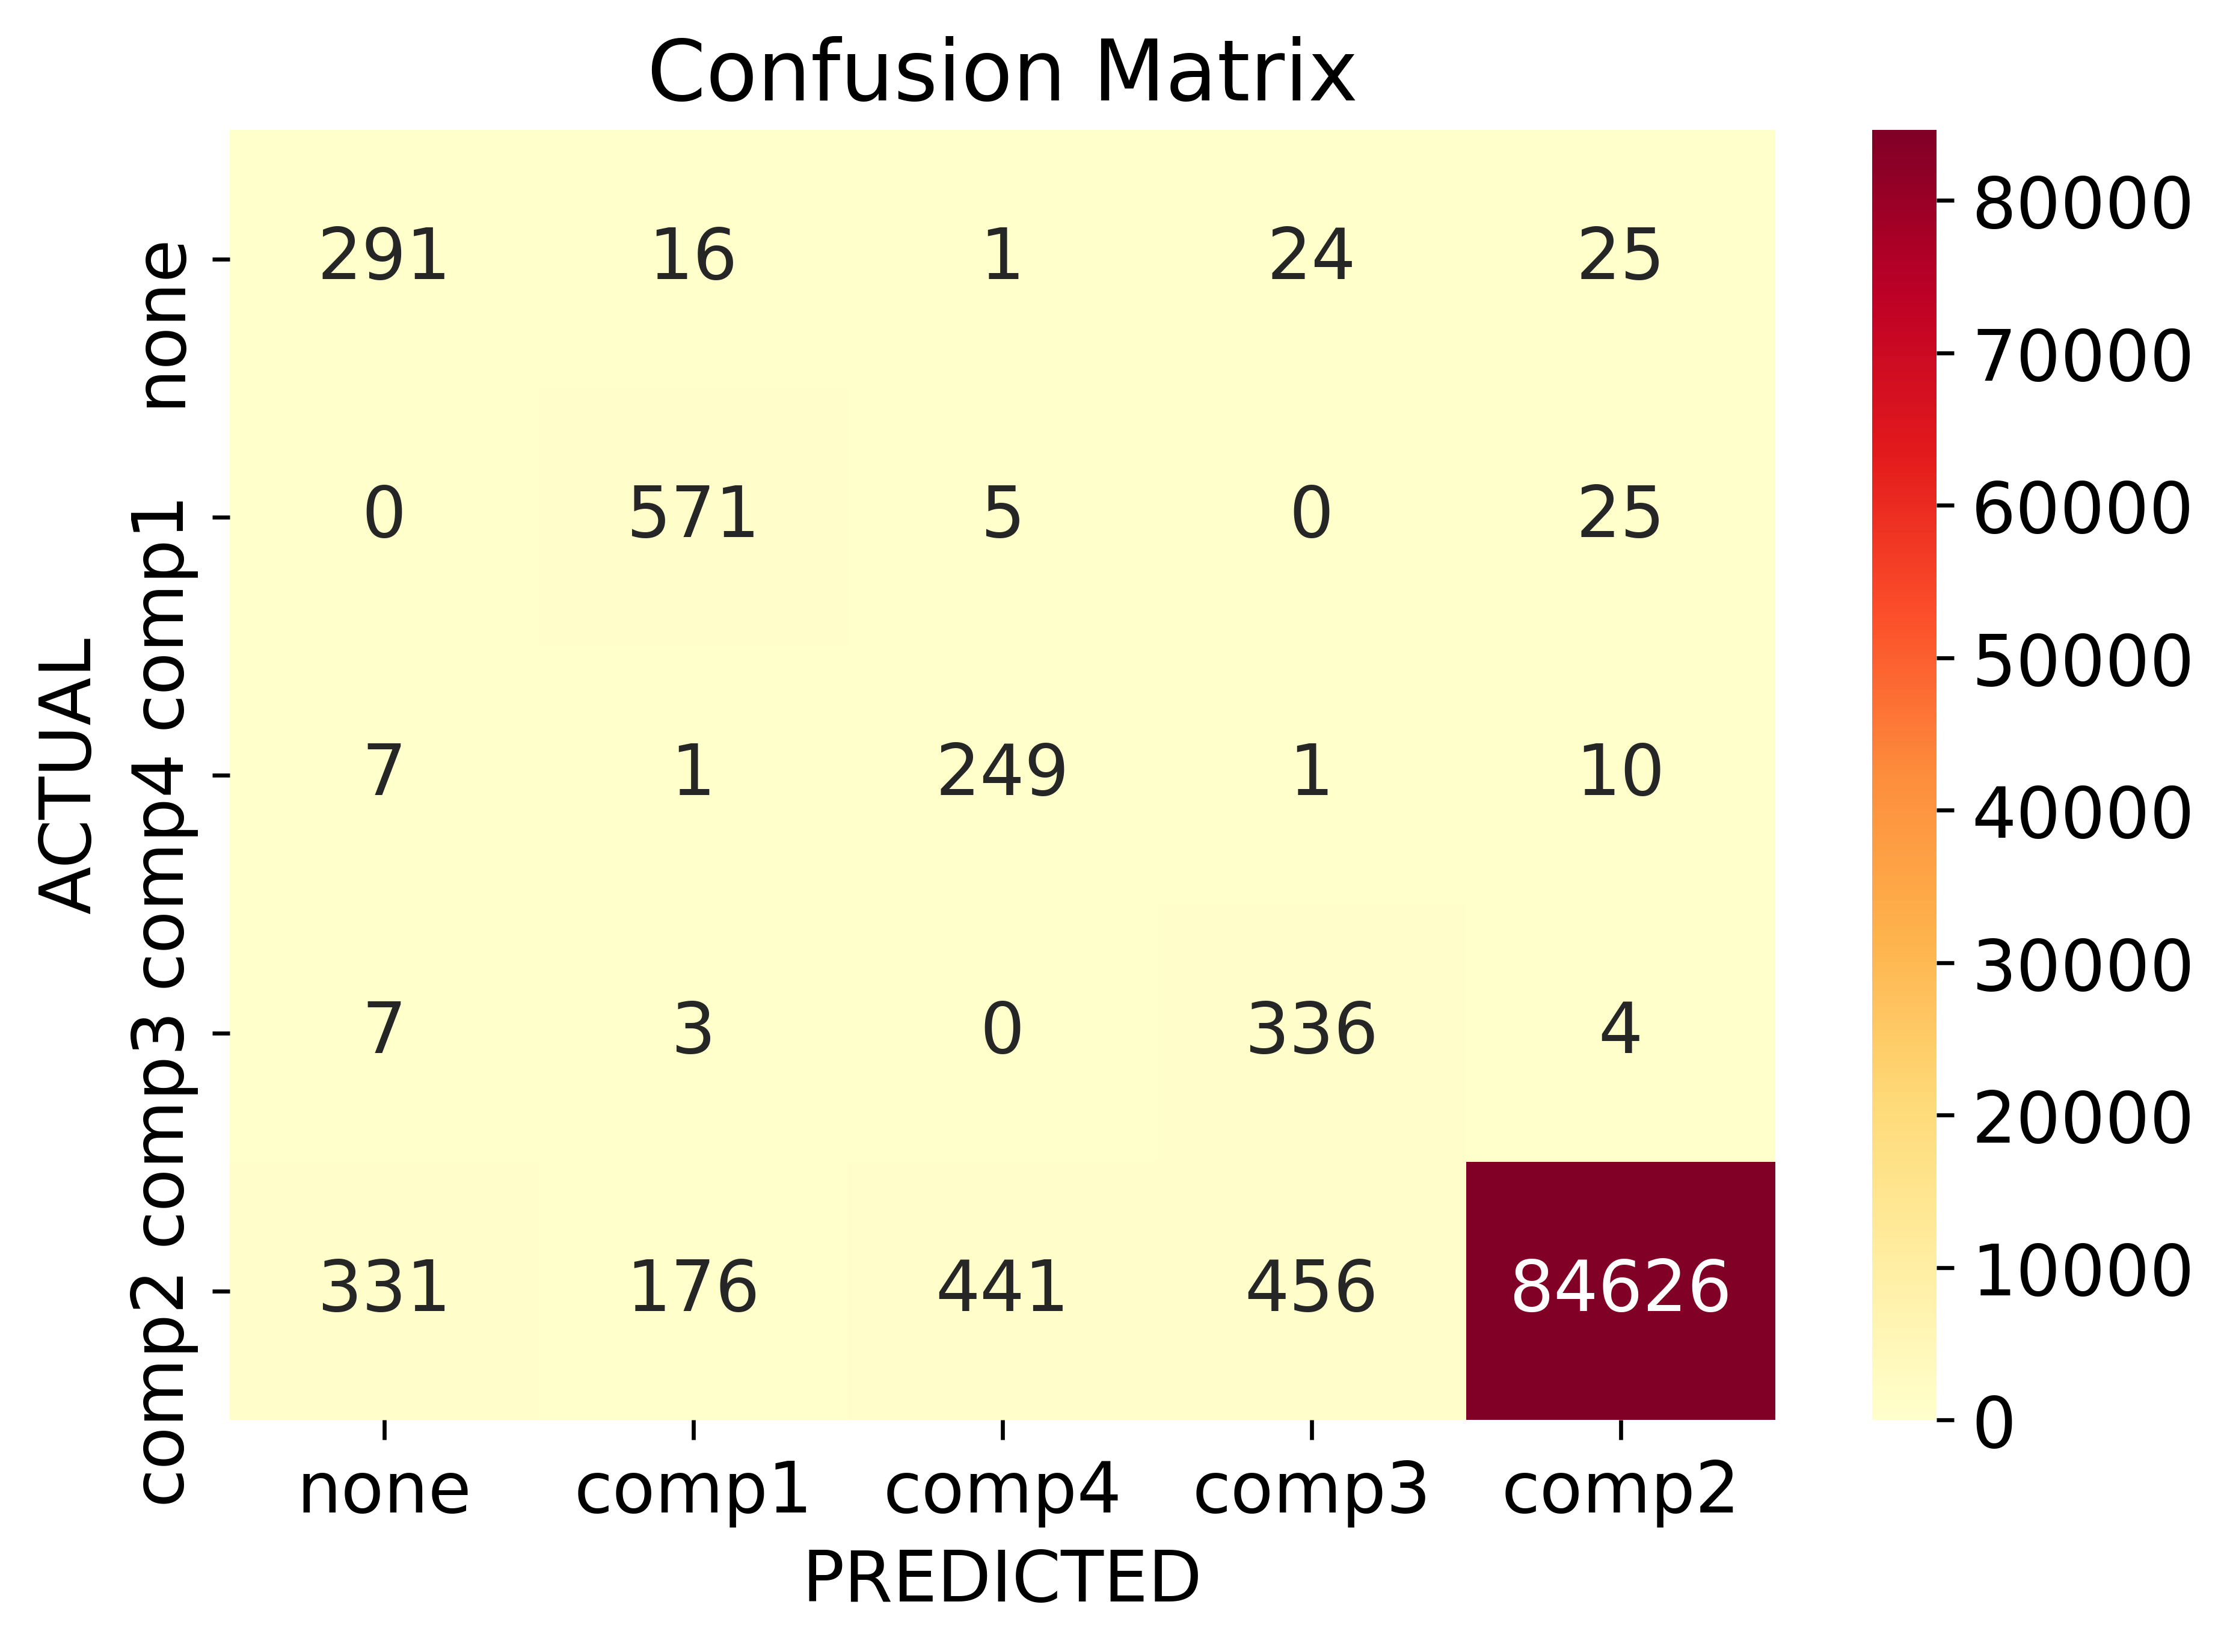


=======================================> PLOTS <=========================================


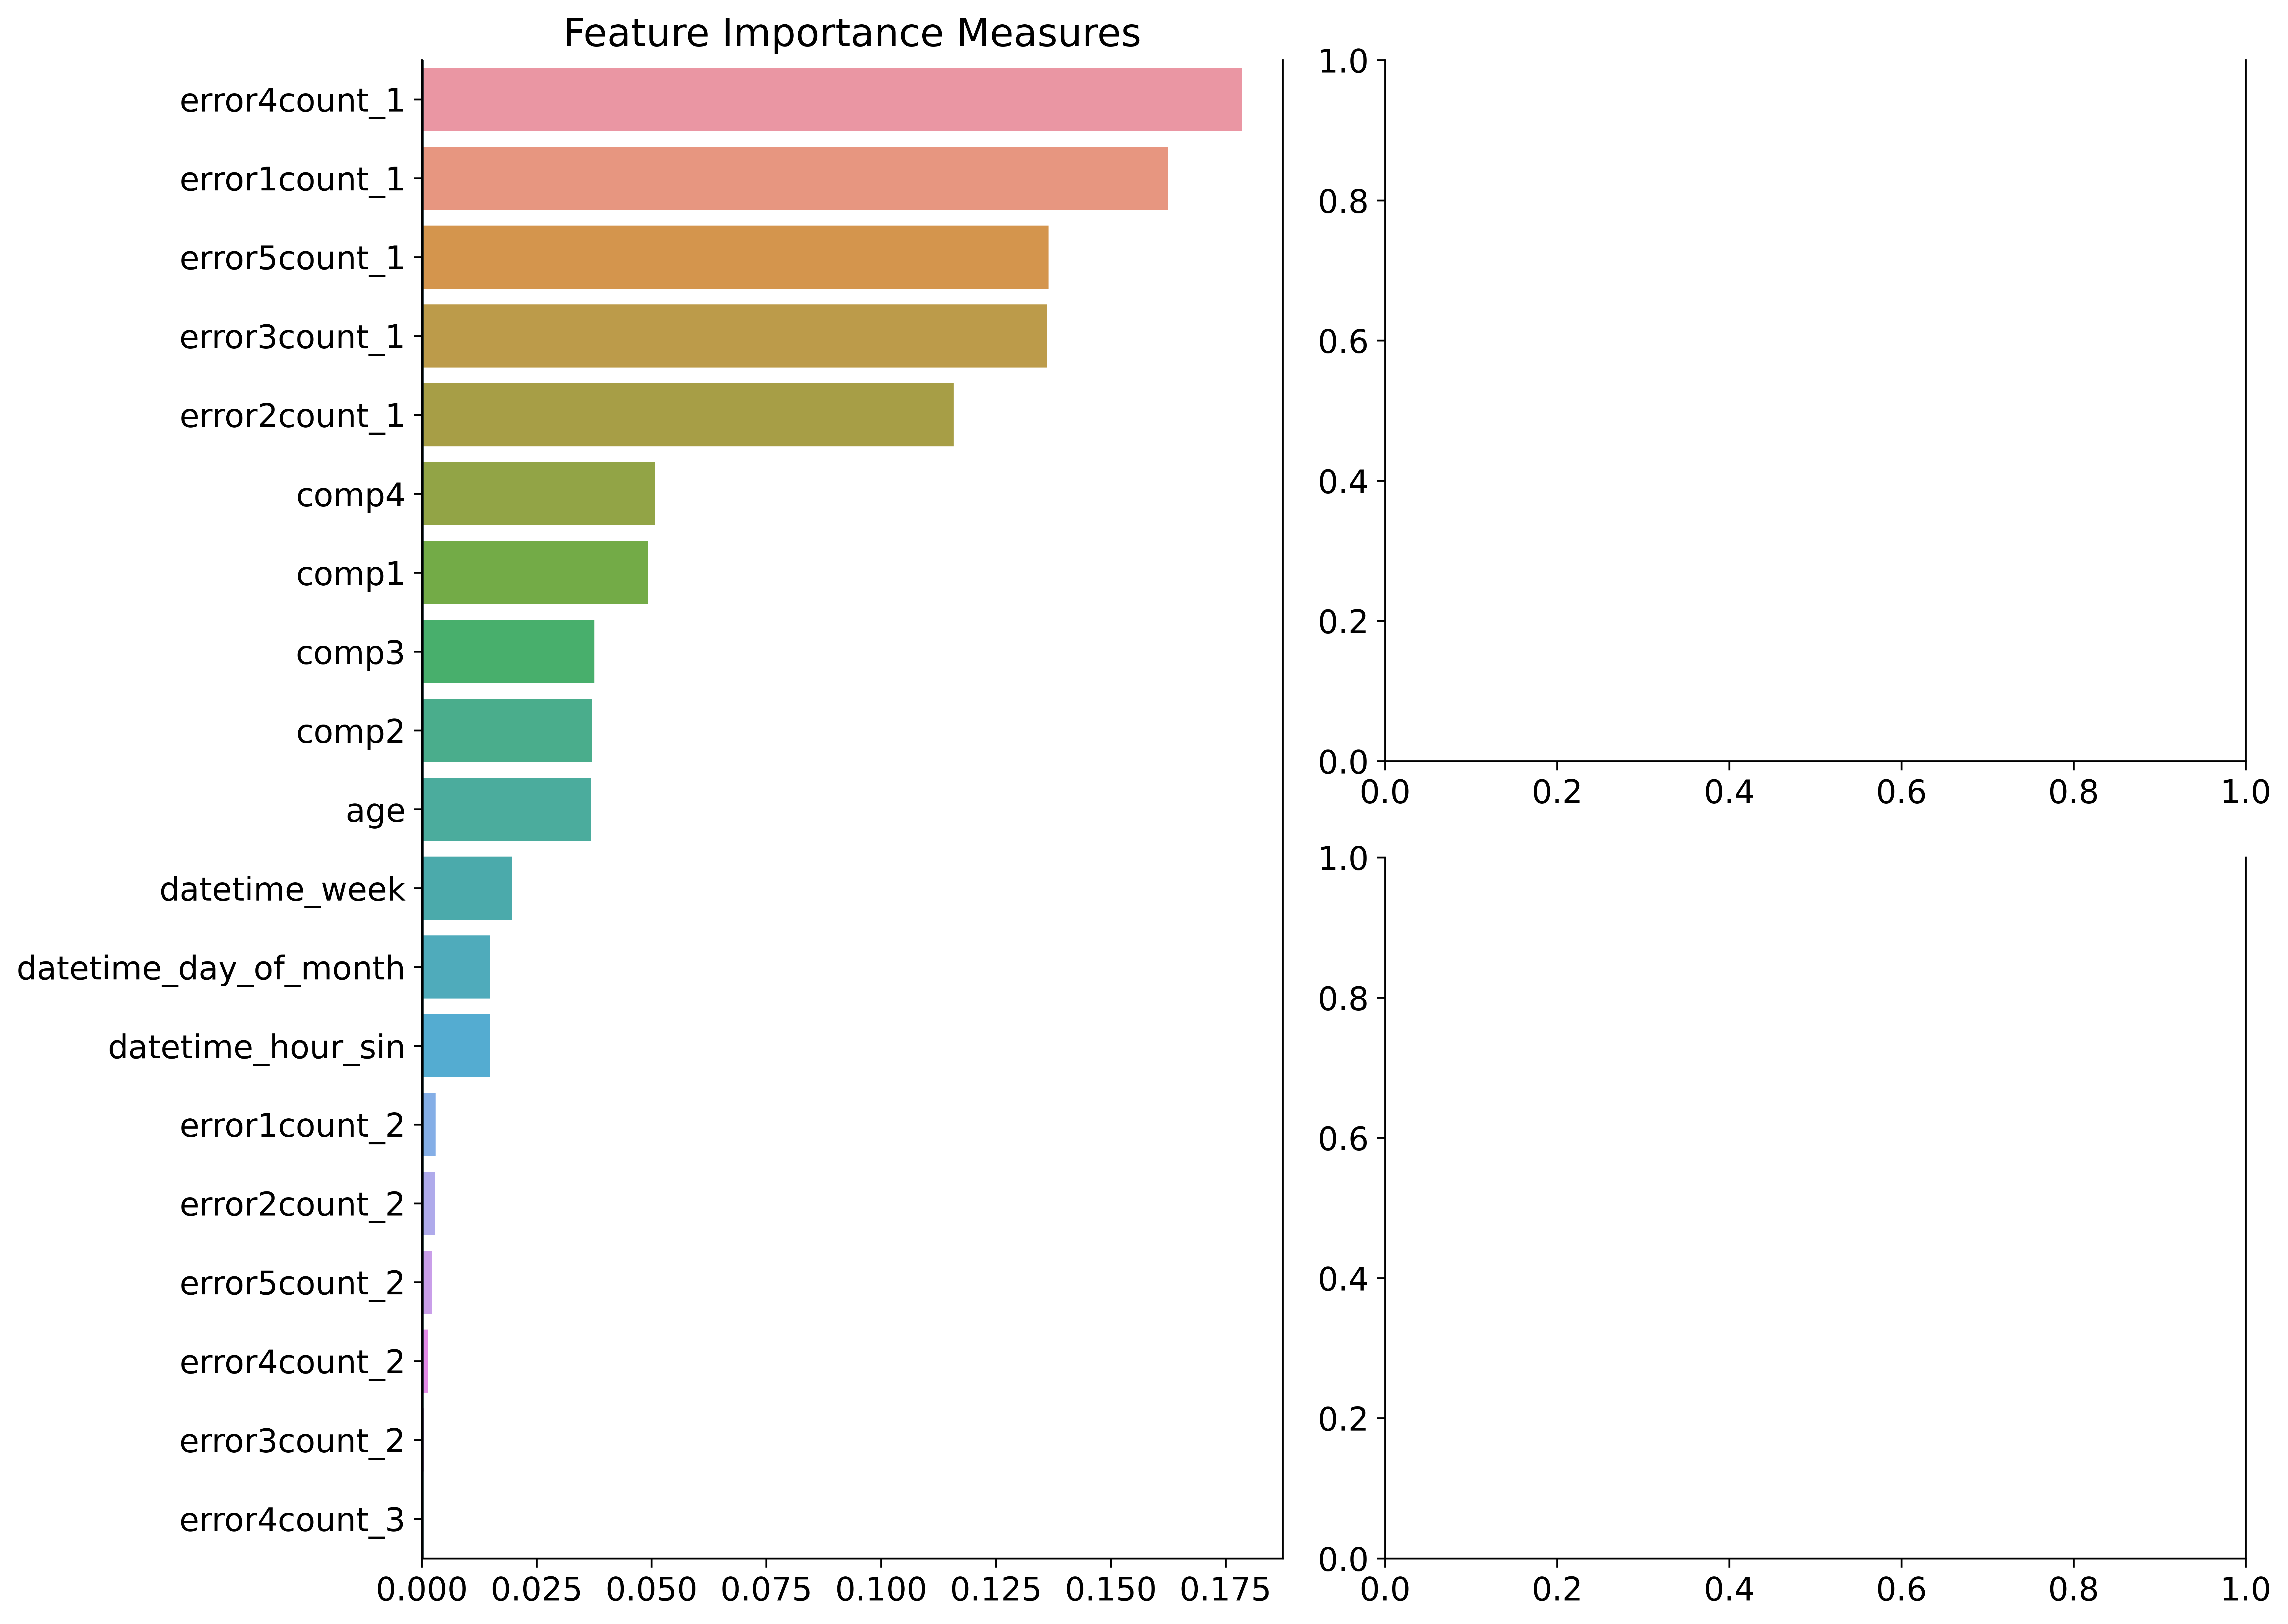

In [63]:
random_forest = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                                       max_depth=9, 
                                    #    max_depth=8, 
                                       max_features=0.2,
                                       n_estimators=100,
                                       n_jobs=-1, random_state=rng)

random_forest, random_forest_report = report(random_forest, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

In [64]:
report_list = [
    random_forest_report
]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [65]:
compare_table = compare_models(y_test, clf_reports=report_list,
# compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)
compare_table.sort_values(by=['Test f1_score', 'Overfitting'], ascending=[False, False])

,Train f1_score,Test f1_score,Overfitting,Train Accuracy,Test Accuracy,Test ROC-AUC
RandomForestClassifier,0.985309,0.985562,False,0.982755,0.982501,0.993637
